source: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [20]:
learning_rate = 0.01
training_epochs = 10000
display_step = 1000

In [3]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
x = tf.placeholder('float')
y = tf.placeholder('float')

W = tf.Variable(rng.randn(), name = 'weight')
b = tf.Variable(rng.randn(), name = 'bias')

In [5]:
pred = tf.add(tf.multiply(x, W), b)

In [6]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred - y, 2)) / (2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

Epoch:0100 Cost:0.11067 W:0.14734 b:1.53710
Epoch:0200 Cost:0.10336 W:0.15914 b:1.45221
Epoch:0300 Cost:0.09764 W:0.16958 b:1.37711
Epoch:0400 Cost:0.09316 W:0.17881 b:1.31067
Epoch:0500 Cost:0.08965 W:0.18698 b:1.25190
Epoch:0600 Cost:0.08691 W:0.19421 b:1.19991
Epoch:0700 Cost:0.08476 W:0.20060 b:1.15393
Epoch:0800 Cost:0.08308 W:0.20625 b:1.11325
Epoch:0900 Cost:0.08176 W:0.21125 b:1.07727
Epoch:1000 Cost:0.08073 W:0.21568 b:1.04544


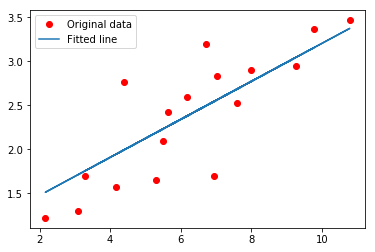

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (xt, yt) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={x: xt, y: yt})
            
        if ((epoch + 1) % display_step) == 0:
            c = sess.run(cost, feed_dict={x: train_X, y: train_Y})
            print(f'Epoch:{epoch + 1:04d} Cost:{c:.5f} W:{sess.run(W):.5f} b:{sess.run(b):.5f}')
            
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    

Epoch:1000 Cost:0.08073 W:0.21669 b:1.04654
Epoch:2000 Cost:0.07726 W:0.24126 b:0.87234
Epoch:3000 Cost:0.07696 W:0.24856 b:0.82063
Epoch:4000 Cost:0.07693 W:0.25072 b:0.80528
Epoch:5000 Cost:0.07693 W:0.25136 b:0.80073
Epoch:6000 Cost:0.07693 W:0.25155 b:0.79937
Epoch:7000 Cost:0.07693 W:0.25161 b:0.79897
Epoch:8000 Cost:0.07693 W:0.25163 b:0.79886
Epoch:9000 Cost:0.07693 W:0.25163 b:0.79883
Epoch:10000 Cost:0.07693 W:0.25163 b:0.79883


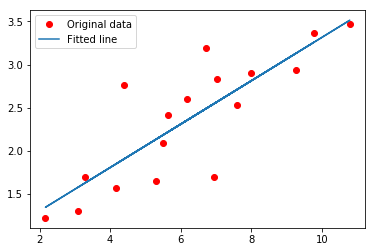

In [22]:
# This is a bit faster because we train the entire data set at once

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={x: train_X, y: train_Y})
            
        if ((epoch + 1) % display_step) == 0:
            c = sess.run(cost, feed_dict={x: train_X, y: train_Y})
            print(f'Epoch:{epoch + 1:04d} Cost:{c:.5f} W:{sess.run(W):.5f} b:{sess.run(b):.5f}')
            
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()